# Model Evaluation and Refinement

In [1]:
import pandas as pd
import numpy as np

# Import clean data 
path = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv"
df = pd.read_csv(path)

In [2]:
df.to_csv('module_5_auto.csv')

In [3]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [4]:
df.dropna (inplace=True)

In [5]:
%%capture
! pip install ipywidgets

In [6]:
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

### Functions for plotting

In [7]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    
    plt.show()
    plt.close()

In [8]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object
    
    xmax = max([xtrain.values.max(), xtest.values.max()])
    xmin = min([xtrain.values.min(), xtest.values.min()])
    
    x = np.arange(xmin, xmax, 0.1)
    
    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1,1))))
    plt.ylim([-10000, 60000])
    plt.ylabel('price')
    plt.legend()

### Training and Testing

In [9]:
y_data = df['price']

In [10]:
x_data = df.drop('price', axis=1)

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:", x_train.shape[0])

number of test samples : 30
number of training samples: 167


### Question #1):

In [12]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 79
number of training samples: 118


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lre = LinearRegression()

In [15]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

### Question #2):

In [16]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.1, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.5139909136674683

### Cross-validation Score

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [19]:
Rcross

array([0.77362635, 0.50678075, 0.80914858, 0.04179279])

In [20]:
print('The mean of the folds are', Rcross.mean(), 'and the standard deviation is', Rcross.std())

The mean of the folds are 0.532837115961248 and the standard deviation is 0.3066475779046709


In [21]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data, cv=4, scoring='neg_mean_squared_error')

array([20516817.78161143, 46402865.48465372,  9500113.47005771,
       17829796.39488585])

### Question #3):

In [22]:
Rcross1 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rcross1[1]
print('The mean of the folds are', Rcross1.mean())

The mean of the folds are 0.5803009523730334


In [23]:
from sklearn.model_selection import cross_val_predict

In [24]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([14164.38864829, 14164.38864829, 20858.30264317, 12763.33688191,
       14787.07832223])

### Overfitting, Underfitting and Model Selection

In [25]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size','highway-mpg']], y_train)

LinearRegression()

In [26]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7835.48190841, 15310.46835166, 21380.79841767, 18290.89075549,
       15348.75206565])

In [27]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([ 6207.7934491 , 18457.09636885, 24276.16259766, 22001.95702223,
       23537.42868922])

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\kbhas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\kbhas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


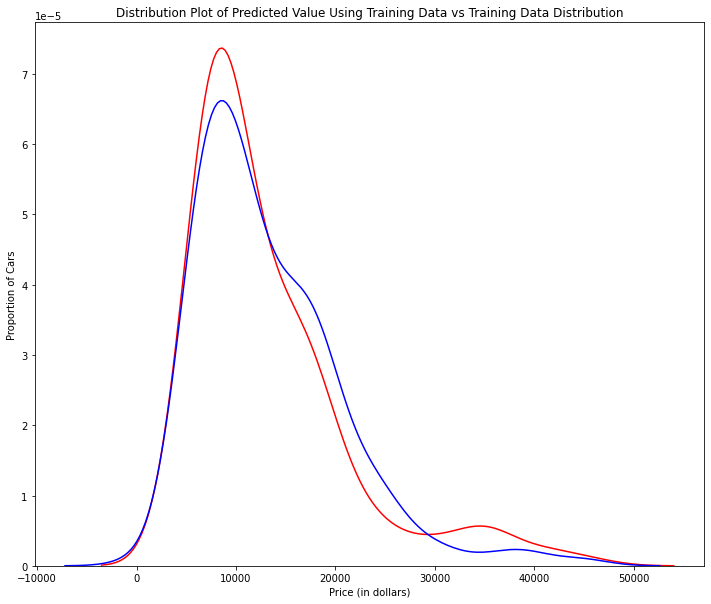

In [29]:
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

C:\Users\kbhas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\kbhas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


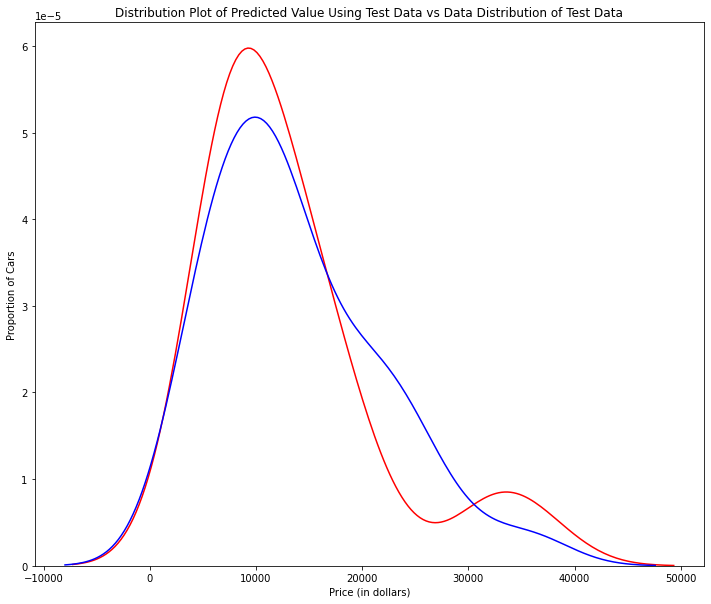

In [30]:
Title = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [31]:
from sklearn.preprocessing import PolynomialFeatures

### Overfitting

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [33]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [34]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [35]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([15597.53558789, 14302.48546011, 10540.1276665 , 11287.71920094,
        6566.94583751])

In [36]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [15597.53558789 14302.48546011 10540.1276665  11287.71920094]
True values: [18150. 21105.  8495.  8499.]


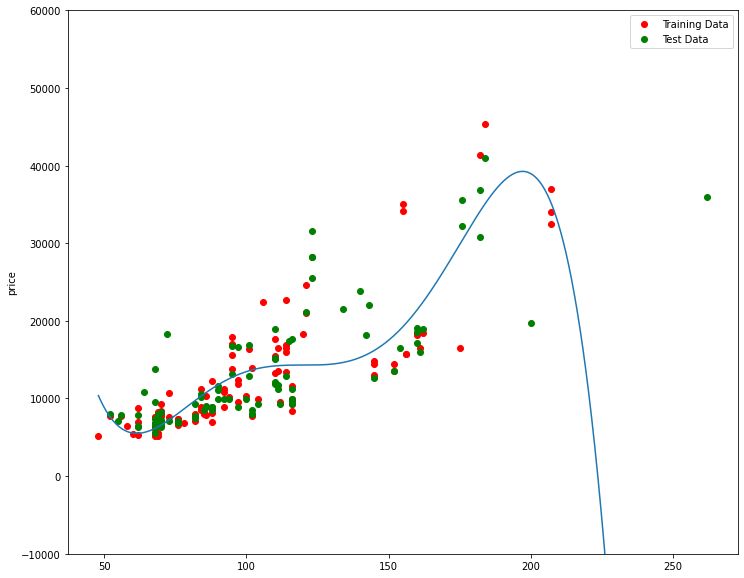

In [37]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

In [38]:
poly.score(x_train_pr, y_train)

0.7368481795566324

In [39]:
poly.score(x_test_pr, y_test)

-34.897519543724734

Text(3, 0.75, 'Maximum R^2')

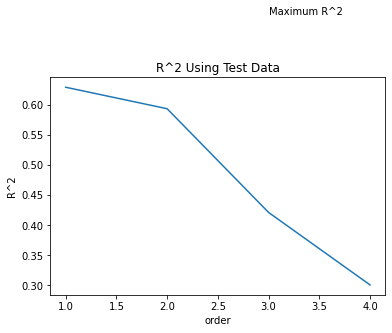

In [41]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2')    

In [42]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

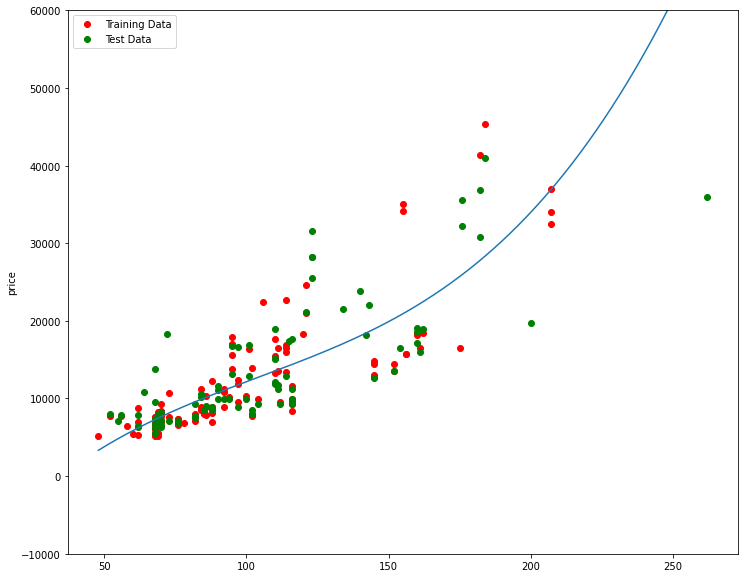

<function __main__.f(order, test_data)>

In [43]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

### Question #4a):

In [44]:
pr1=PolynomialFeatures(degree=2)

### Question #4b):

In [45]:
x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

### Question #4c): 

In [46]:
x_train_pr1.shape 

(108, 70)

### Question #4d):

In [49]:
from sklearn.linear_model import LinearRegression
poly1=LinearRegression().fit(x_train_pr1,y_train)

### Question #4e):

C:\Users\kbhas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\kbhas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


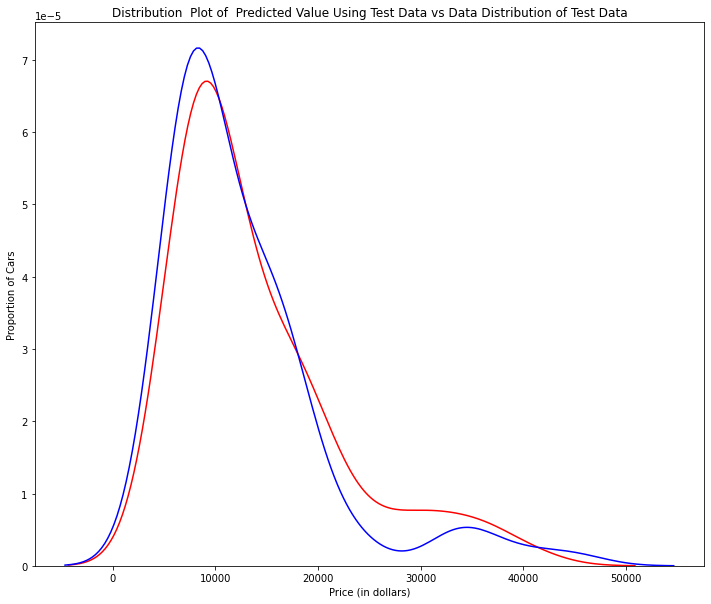

In [50]:
yhat_test1=poly1.predict(x_train_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

### Question #4f):

In [53]:
%%html
<img src = "https://ibm.box.com/shared/static/c35ipv9zeanu7ynsnppb8gjo2re5ugeg.png" width = 700, align = "center">

### Ridge regression

In [54]:
pr = PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [55]:
from sklearn.linear_model import Ridge

In [56]:
RigeModel = Ridge(alpha=0.1)

In [57]:
RigeModel.fit(x_train_pr,y_train)

Ridge(alpha=0.1)

In [58]:
yhat = RigeModel.predict(x_test_pr)

In [59]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 7727.55739229 18553.3989823   9518.74767604 12219.41725734]
test set : [18150. 21105.  8495.  8499.]


In [60]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa)
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

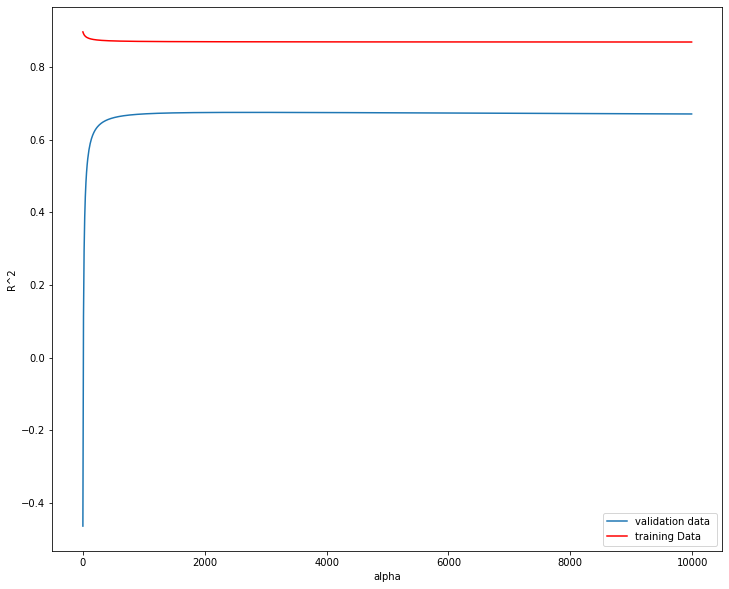

In [61]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA, Rsqu_test, label='validation data ')
plt.plot(ALFA, Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

### Question #5): 

In [62]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.11249648988142946

### Grid Search

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
parameters1 = [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [65]:
RR = Ridge()
RR

Ridge()

In [66]:
Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [67]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [68]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [69]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8525061550519526

### Question #6):

In [70]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

C:\Users\kbhas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\kbhas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproce

C:\Users\kbhas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\kbhas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproce

Ridge(alpha=1, normalize=True)